In [71]:
from logging import critical

import numpy as np
import matplotlib.pyplot as plt
import scipy

In [72]:

#read in the file with the data
measurement_01_data = np.loadtxt('data/Measurement 1_1046', skiprows= 7 )
measurement_02_data = np.loadtxt('data/Measurement 2_1121', skiprows=7)
measurement_03_data = np.loadtxt('data/Measurement 3_1205', skiprows = 7)
measurement_04_data = np.loadtxt('data/Measurement 4_1225_B-field 15A', skiprows = 7)
measurement_05_data = np.loadtxt('data/Measurement 5_1300_B-field 15A', skiprows = 7)

measurement_06_data = np.loadtxt('data/Measurement 6_1349_Over night_right', skiprows = 7)

In [73]:
#flip the V- data and add a shift of 0.00001 V
'''all_data = [measurement_01_data, measurement_02_data, measurement_03_data, measurement_04_data, measurement_05_data,
             measurement_06_data]

for data in all_data :
    data[:,4] = -data[:,4] + 0.0001
    #shift the V+ data by 0.00008 V down
    data[:,2] = data[:,2] - 0.00008'''
    


'all_data = [measurement_01_data, measurement_02_data, measurement_03_data, measurement_04_data, measurement_05_data,\n             measurement_06_data]\n\nfor data in all_data :\n    data[:,4] = -data[:,4] + 0.0001\n    #shift the V+ data by 0.00008 V down\n    data[:,2] = data[:,2] - 0.00008'

Tbefore, I+, V+, I-, V-, Tafter, Tbase,Time


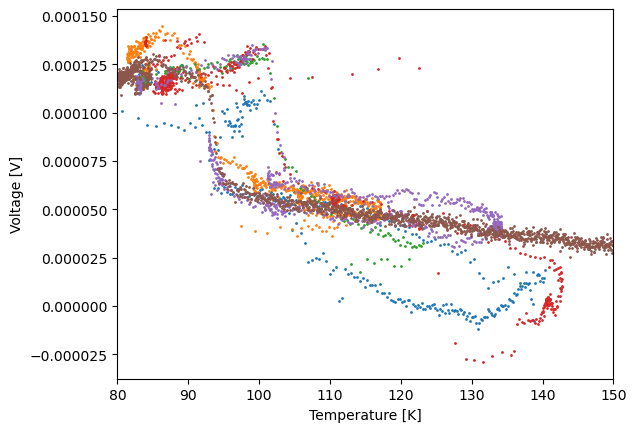

In [74]:
#plot the temperature average against the average of voltage


for data in all_data :
    plt.scatter(data[:,5],data[:,4], s = 1)
    plt.xlabel('Temperature [K]')
    plt.ylabel('Voltage [V]')
    plt.xlim(80,150)


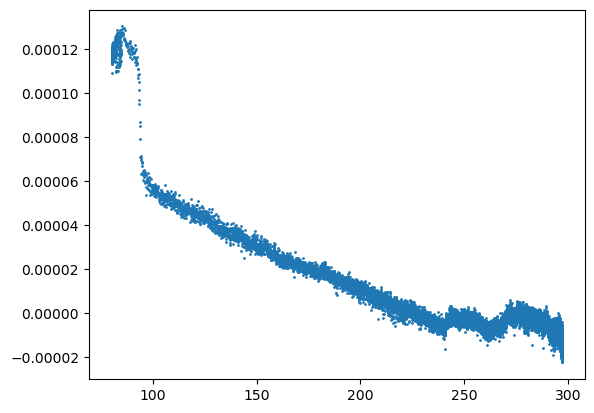

In [75]:
plt.scatter(measurement_06_data[:,5], measurement_06_data[:,4], s =1)

# Auswertungsidee

## Mache zuerst alle Auswertungen für das erste Datenset

1. Show heatin and cooling curve
2. show the averaged voltage against the temperature distinguish between heating and cooling with colours
3. 

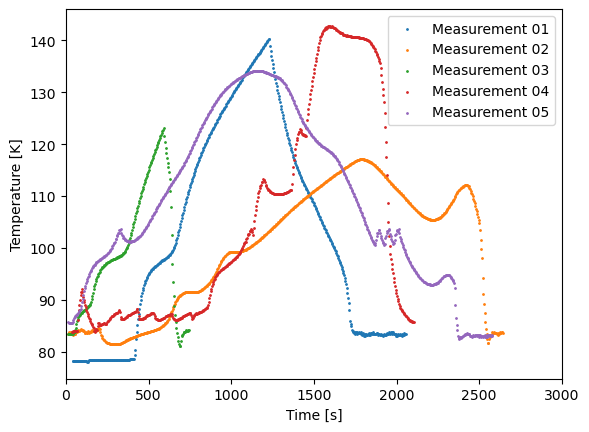

In [76]:
# 1. Show heating and cooling curve
#temperature_uncertainty_01 =  np.abs(measurement_01_data[:,5] - measurement_01_data[:,0])

measurement_01_data_average_temperature = (measurement_01_data[:,0] + measurement_01_data[:,5]) / 2
measurement_02_data_average_temperature = (measurement_02_data[:,0] + measurement_02_data[:,5]) / 2
measurement_03_data_average_temperature = (measurement_03_data[:,0] + measurement_03_data[:,5]) / 2
measurement_04_data_average_temperature = (measurement_04_data[:,0] + measurement_04_data[:,5]) / 2
measurement_05_data_average_temperature = (measurement_05_data[:,0] + measurement_05_data[:,5]) / 2
measurement_06_data_average_temperature = (measurement_06_data[:,0] + measurement_06_data[:,5]) / 2


plt.scatter(measurement_01_data[:,7],measurement_01_data_average_temperature, s = 1)
plt.scatter(measurement_02_data[:,7],measurement_02_data_average_temperature, s = 1)
plt.scatter(measurement_03_data[:,7],measurement_03_data_average_temperature, s = 1)
plt.scatter(measurement_04_data[:,7],measurement_04_data_average_temperature, s = 1)
plt.scatter(measurement_05_data[:,7],measurement_05_data_average_temperature, s = 1)

#add error bars to the plot
plt.errorbar(measurement_01_data[:,7],measurement_01_data_average_temperature, fmt = 'none')



plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.xlim(0, 3000)
plt.legend(['Measurement 01', 'Measurement 02', 'Measurement 03', 'Measurement 04', 'Measurement 05'], loc = 'upper '
                                                                                                          'right')
plt.savefig('heating_cooling_curve_01_05.png')
plt.show()




## Discussion
The heatin and cooling curves are pretty inconsistent due to some handling problems with the measurement device 
setting and restting the goal temperature was not very helpfull to get a consistent curve.

It should not matter that much for the further analysis, since the volatage is only dependent on the temperature and 
not on the time.$

## Error bars not plotted because versy small would oly make it unreadable



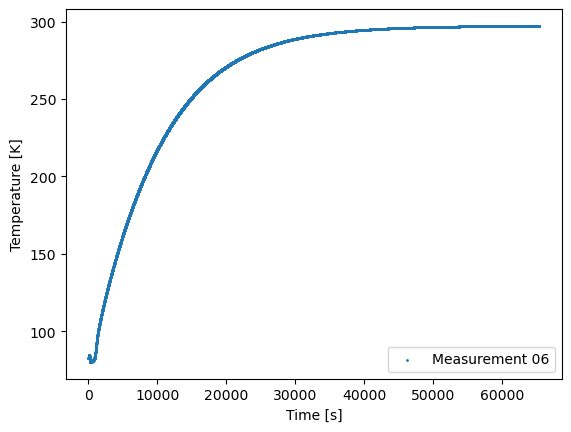

In [77]:
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.scatter(measurement_06_data[:,7],measurement_06_data_average_temperature, s = 1)
plt.savefig('heating_cooling_curve_06.png')
plt.legend(['Measurement 06'], loc = 'lower right')
plt.show()

## Discussion
The measurement number 6 was interrupted and the goal temperature was reset. This is why the curve is complete the 
other one ran over night and is a complete curve.

# Analysis of the raw data to see if the data is usable
- split the data into heating and cooling
- show the voltages against time
- show the voltages of V+ and V- against the temperature
- for all 6 different measurements
- 

In [78]:
#split the data into heating and cooling
#index of the maximal temperature
max_temperature_index_01 = np.argmax(measurement_01_data_average_temperature)
max_temperature_index_02 = np.argmax(measurement_02_data_average_temperature)
max_temperature_index_03 = np.argmax(measurement_03_data_average_temperature)
max_temperature_index_04 = np.argmax(measurement_04_data_average_temperature)
max_temperature_index_05 = np.argmax(measurement_05_data_average_temperature)
max_temperature_index_06 = np.argmax(measurement_06_data_average_temperature)

heating_data_01 = measurement_01_data[:max_temperature_index_01]
cooling_data_01 = measurement_01_data[max_temperature_index_01:]

heating_data_02 = measurement_02_data[:max_temperature_index_02]
cooling_data_02 = measurement_02_data[max_temperature_index_02:]

heating_data_03 = measurement_03_data[:max_temperature_index_03]
cooling_data_03 = measurement_03_data[max_temperature_index_03:]

heating_data_04 = measurement_04_data[:max_temperature_index_04]
cooling_data_04 = measurement_04_data[max_temperature_index_04:]

heating_data_05 = measurement_05_data[:max_temperature_index_05]
cooling_data_05 = measurement_05_data[max_temperature_index_05:]

heating_data_06 = measurement_06_data


# Analysis of V+ against time

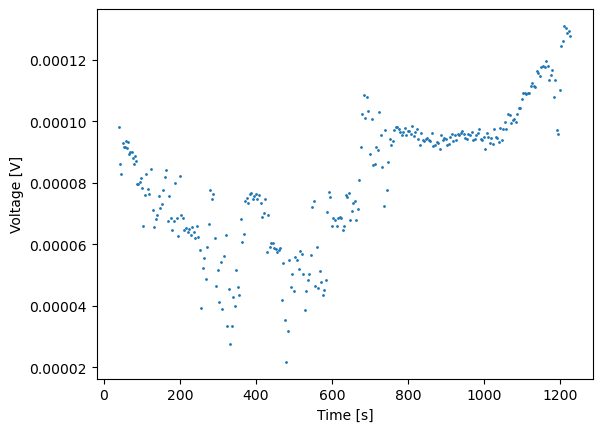

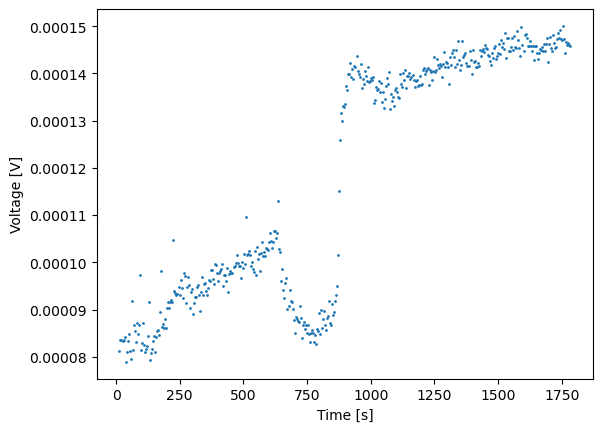

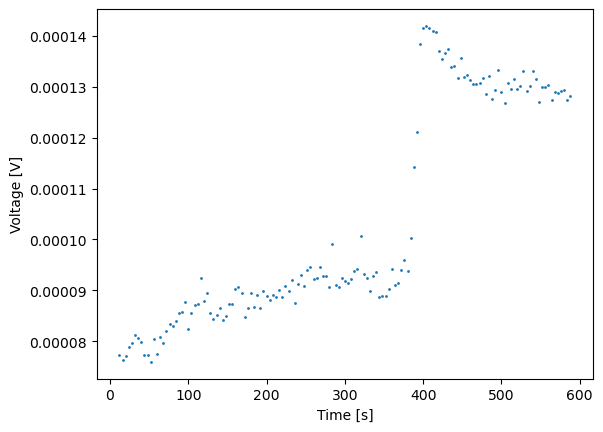

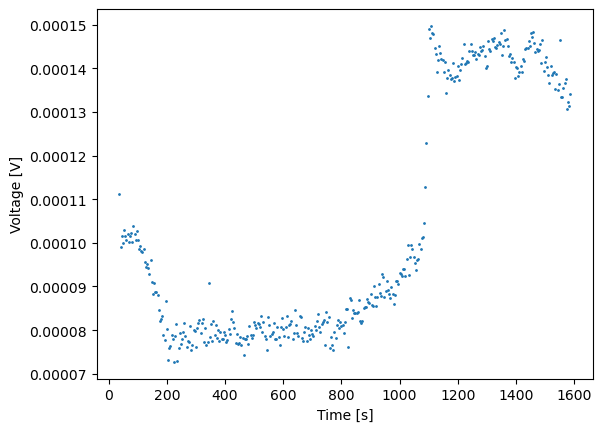

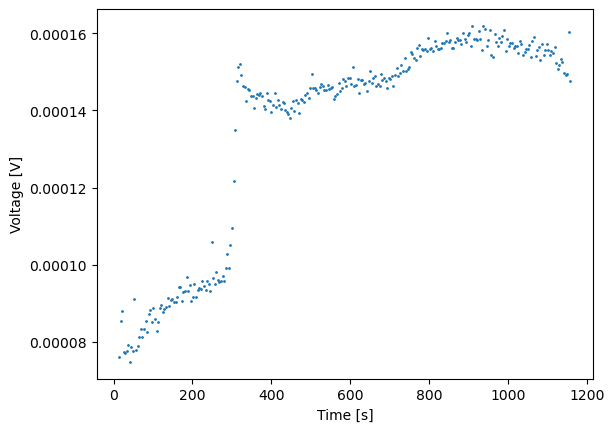

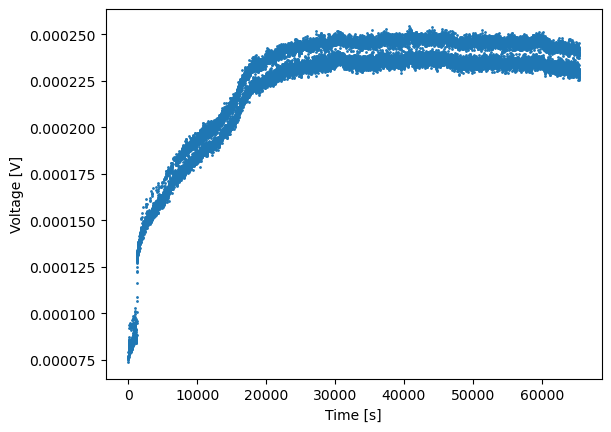

In [94]:
#plot the voltage V+ against the time for the heating and cooling data only for heating
titles = ['heating_time_vs_voltage_01_Vplus.png', 'heating_time_vs_voltage_02_Vplus.png', 'heating_time_vs_voltage_03_Vplus.png',
          'heating_time_vs_voltage_04_Vplus.png', 'heating_time_vs_voltage_05_Vplus.png', 'heating_time_vs_voltage_06_Vplus.png']
for data in [heating_data_01, heating_data_02, heating_data_03, heating_data_04, heating_data_05, heating_data_06] :
    plt.scatter(data[:,7], data[:,2], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    #invert title array
    titles = titles[::-1]
    plt.savefig(titles.pop())
    plt.show()




# plot the voltage V- against the time for heating


78.183 140.234
83.484 117.088
83.528 122.835
83.87 142.527
85.688 134.172
82.602 297.158


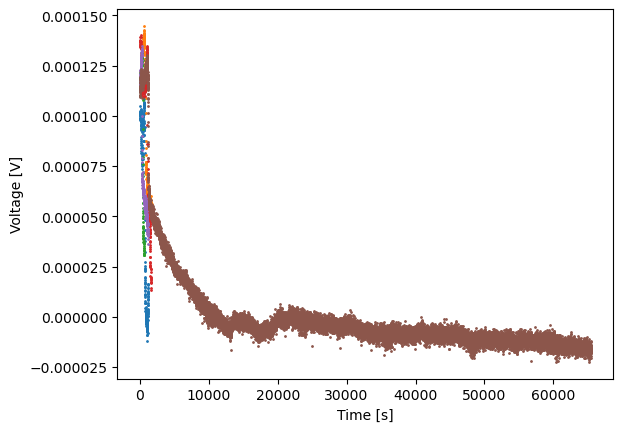

In [97]:
#plot the voltage V- against the time for the heating and cooling data only for heating
titles = ['heating_time_vs_voltage_01_Vminus.png', 'heating_time_vs_voltage_02_Vminus.png', 
          'heating_time_vs_voltage_03_Vminus.png', 'heating_time_vs_voltage_04_Vminus.png', 'heating_time_vs_voltage_05_Vminus.png', 'heating_time_vs_voltage_06_Vminus.png']

for data in [heating_data_01, heating_data_02, heating_data_03, heating_data_04, heating_data_05, heating_data_06] :
    #print the value of the temperature first and last
    print(data[0,5], data[-1,5])
    plt.scatter(data[:,7], data[:,4], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    #invert title array
    titles = titles[::-1]
    plt.savefig(titles.pop())
    

## Discussion for the heating data 
# V+
- the first times heating does not make sense because the curve is very noisy, probably some problem there
- all the other curves look pretty good and can be used for further analysis
# V-
- all the plots are shifted by approximatly 0.0001 V to the top 
- all five measuurements look feasible

# Analysis of the cooling data
## V+

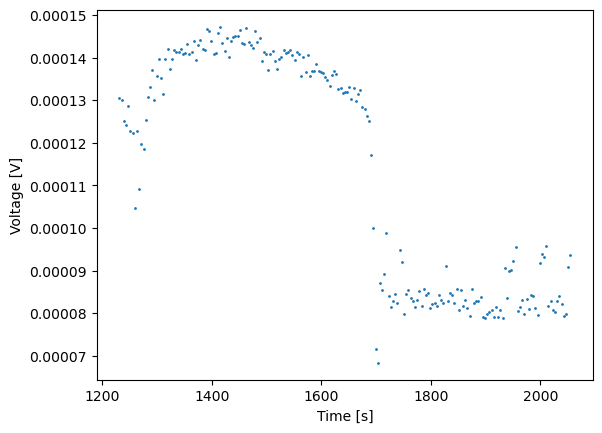

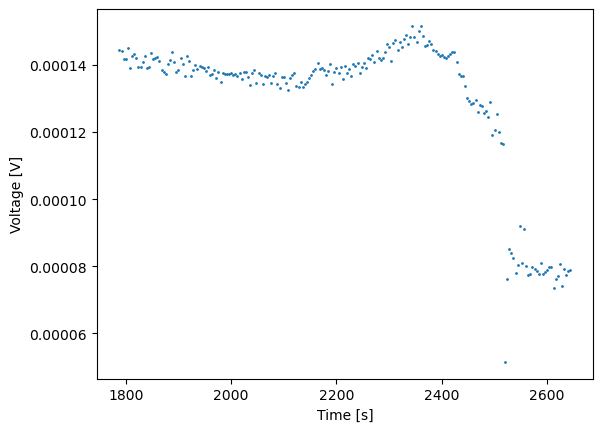

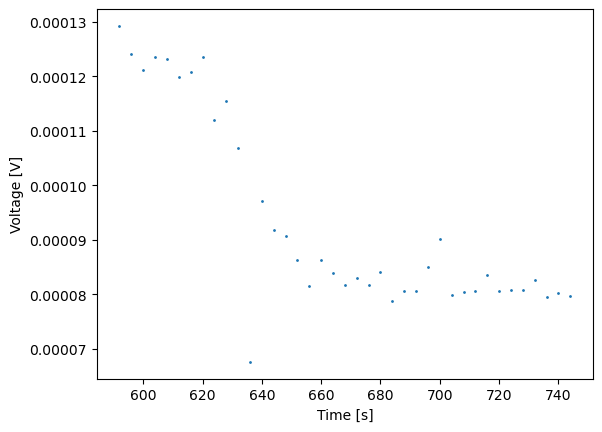

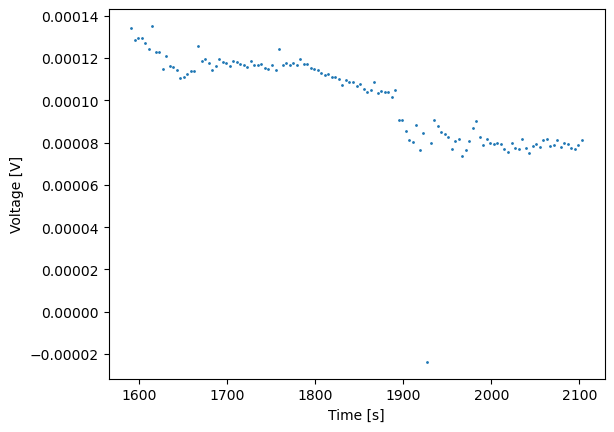

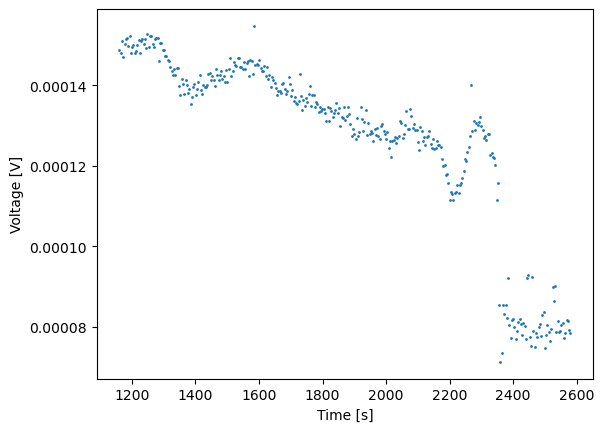

In [96]:
#plot the voltage V+ against the time for cooling
titles = ['cooling_time_vs_voltage_01_Vplus.png', 'cooling_time_vs_voltage_02_Vplus.png', 'cooling_time_vs_voltage_03_Vplus.png',
            'cooling_time_vs_voltage_04_Vplus.png', 'cooling_time_vs_voltage_05_Vplus.png']


for data in [cooling_data_01, cooling_data_02, cooling_data_03, cooling_data_04, cooling_data_05] :
    plt.scatter(data[:,7], data[:,2], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    #invert title array
    titles = titles[::-1]
    plt.savefig(titles.pop())
    
    plt.show()

# V- against the time for cooling

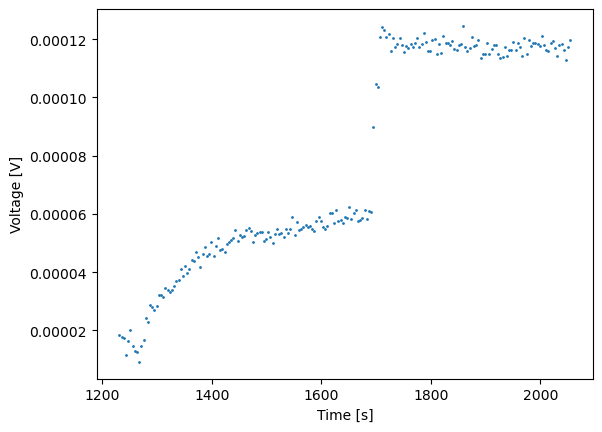

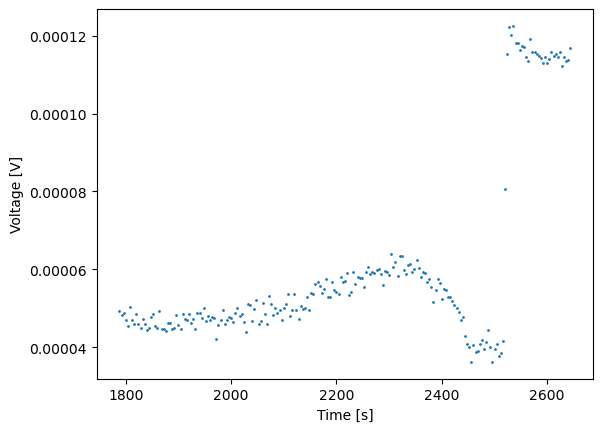

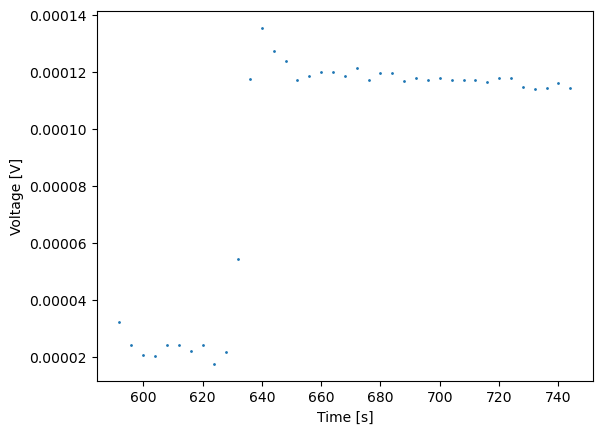

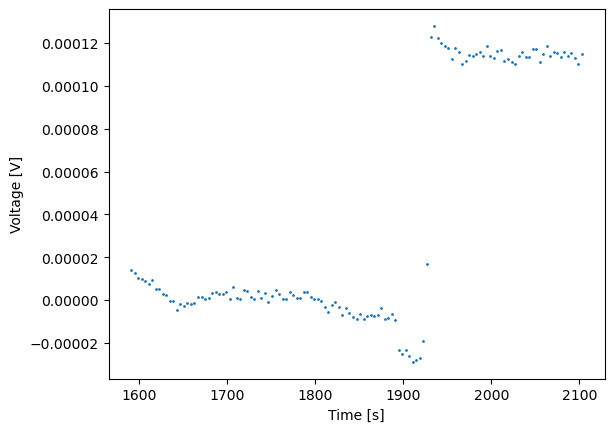

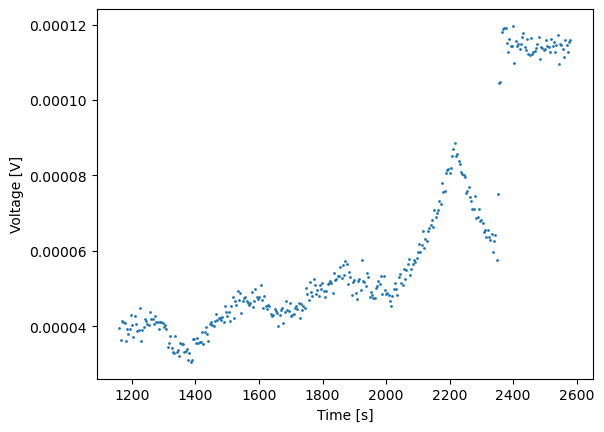

In [98]:
titles = ['cooling_time_vs_voltage_01_Vminus.png', 'cooling_time_vs_voltage_02_Vminus.png', 'cooling_time_vs_voltage_03_Vminus.png',
            'cooling_time_vs_voltage_04_Vminus.png', 'cooling_time_vs_voltage_05_Vminus.png']

for data in [cooling_data_01, cooling_data_02, cooling_data_03, cooling_data_04, cooling_data_05] :
    plt.scatter(data[:,7], data[:,4], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    #invert title array
    titles = titles[::-1]
    plt.savefig(titles.pop())
    plt.show()

## Discussion for the cooling data
# V +
- the cooling data looks pretty good and can be used for further analysis
- ecept for number 4 there is not much difference but still the data is usable
# V-
- The cooling data looks as if with a lower temperature the voltage is higher
- but that shoul no be the case, therefore the data is flipped and shifted by 0.0001 V 

# Analysis of the voltage vs. temperature data
- plot the original data of the voltage against the temperature
- bin the data into small bins for the temperature and then show how they look


In [83]:
#plot the hea

#old stuff


Text(0.5, 1.0, 'Voltage V+ against temperature')

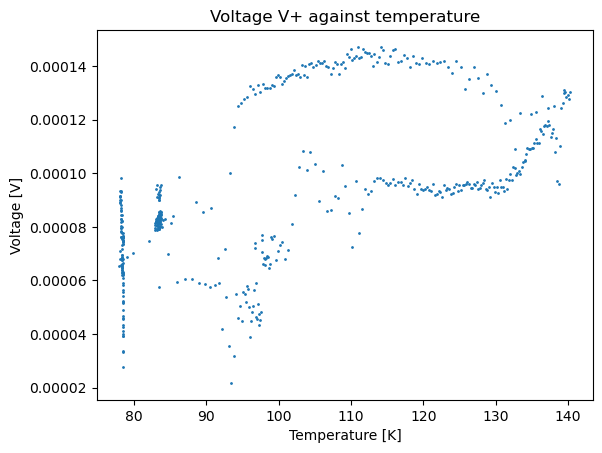

In [84]:
#plot the original T before Data versis the V + data
plt.scatter(measurement_01_data[:,0], measurement_01_data[:,2], s = 1)
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.title('Voltage V+ against temperature')

Text(0.5, 1.0, 'Voltage V- against temperature')

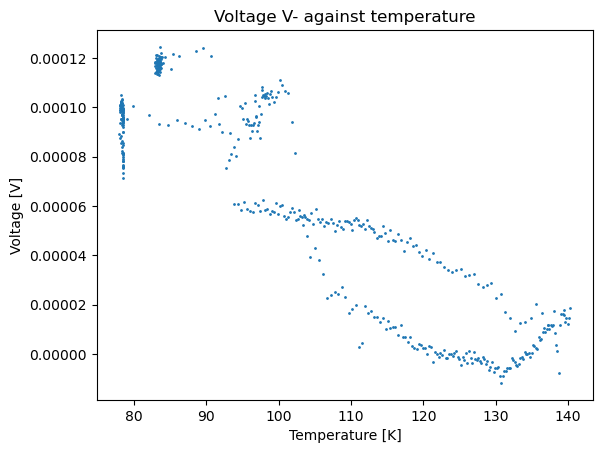

In [85]:
#plot the original T before Data versus the V - data
plt.scatter(measurement_01_data[:,0], measurement_01_data[:,4], s = 1)
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.title('Voltage V- against temperature')



this data looks not easy to interpret, lets try to plot the data binned into temperature steps o 1 kelvin


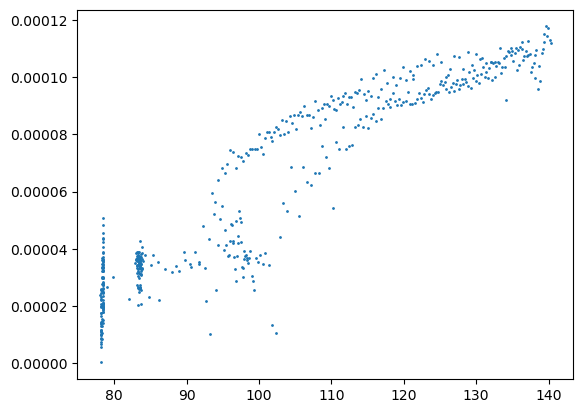

In [86]:
#compare the measurements made with the V+ and V- data
plt.scatter(measurement_01_data[:,0], abs(measurement_01_data[:,4] - measurement_01_data[:,2]), s = 1)


# Data preprocessing of Voltage data
- split cooling from heating 
- bin the data  
- average the data from V+ and V-
- make bins based on the averge measured temperatures

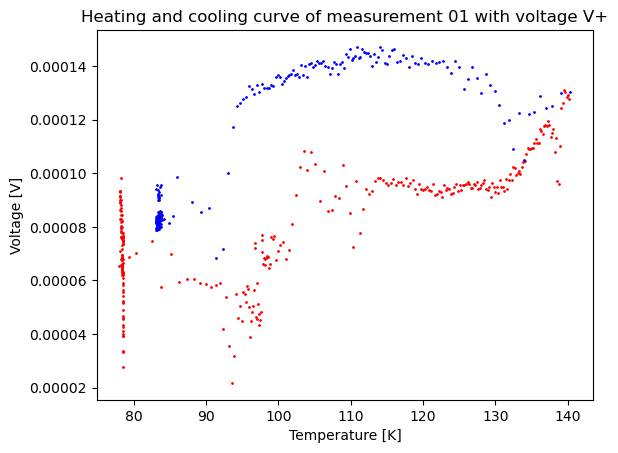

In [87]:
#split the data into heating and cooling
#index of the maximal temperature
max_temperature_index = np.argmax(measurement_01_data_average_temperature)
heating_data = measurement_01_data[:max_temperature_index]
cooling_data = measurement_01_data[max_temperature_index:]

average_heating_temperature = (heating_data[:,0] + heating_data[:,5]) / 2
average_cooling_temperature = (cooling_data[:,0] + cooling_data[:,5]) / 2



#bin the data into small bins for the temperature and then show how they look
plt.scatter(average_heating_temperature, heating_data[:,2], s = 1, color = 'red')
plt.scatter(average_cooling_temperature, cooling_data[:,2], s = 1, color = 'blue')
plt.title('Heating and cooling curve of measurement 01 with voltage V+')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')

plt.show()

In [88]:
#bin the data into small bins for the temperature and then show how they look 

scipy.stats.binned_statistic(heating_data[:,5], heating_data[:,4], bins = 10)

BinnedStatisticResult(statistic=array([ 9.37010524e-05,  9.32455000e-05,  9.09255870e-05,  1.01699967e-04,
        3.62078250e-05,  1.45769113e-05,  4.96984291e-06, -9.86346593e-07,
       -4.79777833e-06,  7.14975155e-06]), bin_edges=array([ 78.05  ,  84.2684,  90.4868,  96.7052, 102.9236, 109.142 ,
       115.3604, 121.5788, 127.7972, 134.0156, 140.234 ]), binnumber=array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4

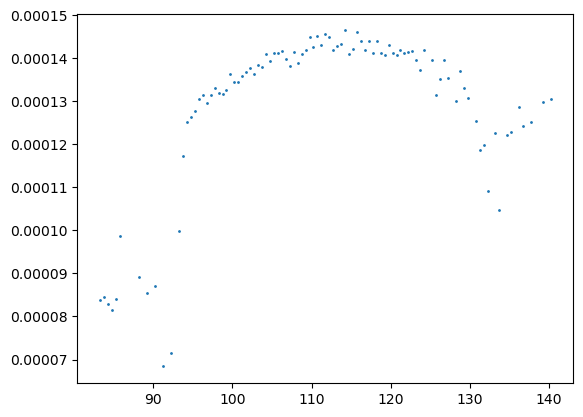

In [89]:
#bin the cooling data into small bins for the temperature and then show how they look


bin_edges = np.arange(np.floor(average_cooling_temperature.min()), np.ceil(average_cooling_temperature.max()) + 1, 0.5)

# Compute the average voltage for each degree of temperature
binned_statistic_Vplus = scipy.stats.binned_statistic(average_cooling_temperature, cooling_data[:,2], statistic='mean', 
                                                bins=bin_edges)


# Extract the bin centers and the average voltages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
average_voltages = binned_statistic_Vplus.statistic
#plot the mean of each bin against the temperature

plt.scatter(bin_centers, average_voltages, s = 1)

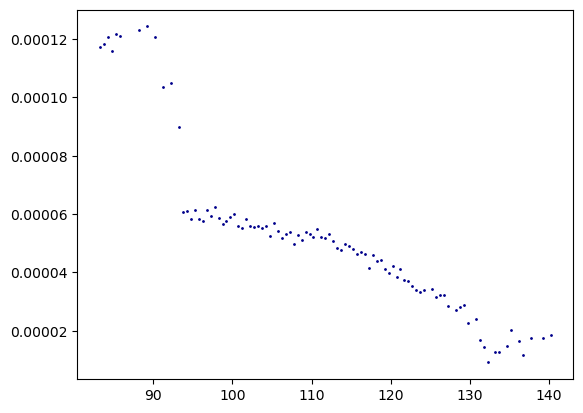

In [90]:
#same for V- data
bin_edges = np.arange(np.floor(average_cooling_temperature.min()), np.ceil(average_cooling_temperature.max()) + 1, 0.5)

# Compute the average voltage for each degree of temperature
binned_statistic = scipy.stats.binned_statistic(average_cooling_temperature, cooling_data[:,4], statistic='mean', 
                                                bins=bin_edges)

# Extract the bin centers and the average voltages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
average_voltages = binned_statistic.statistic
#plot the mean of each bin against the temperature
plt.scatter(bin_centers, average_voltages, s = 1, color = 'darkblue')


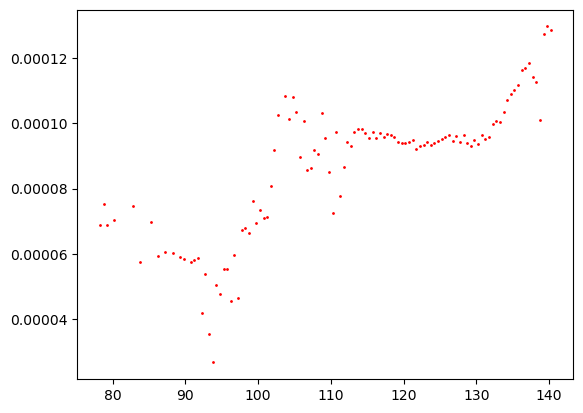

In [91]:
#same for heting data
bin_edges = np.arange(np.floor(average_heating_temperature.min()), np.ceil(average_heating_temperature.max()) + 1, 0.5)

# Compute the average voltage for each degree of temperature
binned_statistic = scipy.stats.binned_statistic(average_heating_temperature, heating_data[:,2], statistic='mean', 
                                                bins=bin_edges)

# Extract the bin centers and the average voltages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
average_voltages = binned_statistic.statistic
#plot the mean of each bin against the temperature
plt.scatter(bin_centers, average_voltages, s = 1, color = 'red')

# Evaluation 
Plot the different curves of each run and develop a Vorgehen to determine the T_c

# NOrmal Electrical behaveiour
- show the behaviour of the sample above the critical temperature 
- is the dependency quadratic or linear ? fit to the curve
- 

# Vorgehen 

- heating und cooling curve mit der Zeit 
- Temperatur gegen Spannung 
- Währscheinlich V- gut und V+ ist schlecht
- 